In [23]:
import numpy as np
from scipy.stats import norm
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

In [24]:
p = np.array([0.10, 0.41, 0, 0.334])
q = np.array([0.11, 0.45, 0.12, 0.345])

In [25]:
def kl(p, q):
    result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
    return result

In [26]:
kl(p, q)

C:\Users\Soheil\AppData\Local\Temp\ipykernel_4556\4271909869.py:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Soheil\AppData\Local\Temp\ipykernel_4556\4271909869.py:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))


np.float64(-0.05852083507175361)

In [27]:
x = np.arange(-10, 10, 0.001)
len(x)

20000

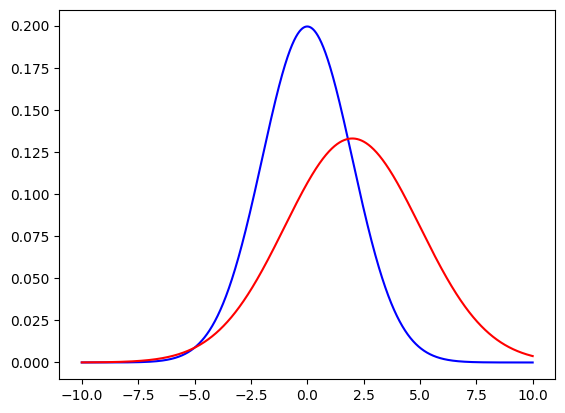

In [28]:
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 3)
plt.plot(x, p, c="blue")
plt.plot(x, q, c="red")

In [29]:
kl(p, q)

np.float64(349.91348337868124)

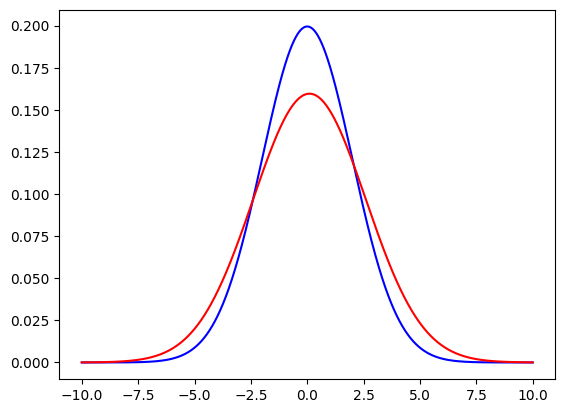

In [30]:
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 0.1, 2.5)
plt.plot(x, p, c="blue")
plt.plot(x, q, c="red")

In [31]:
kl(p, q)

np.float64(43.94620233653506)

In [32]:
data = pd.read_csv("../../datasets/weight-height.csv")
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [33]:
data.groupby('Gender').mean()

,Height,Weight
Gender,,
Female,63.708774,135.860093
Male,69.026346,187.020621


<Axes: >

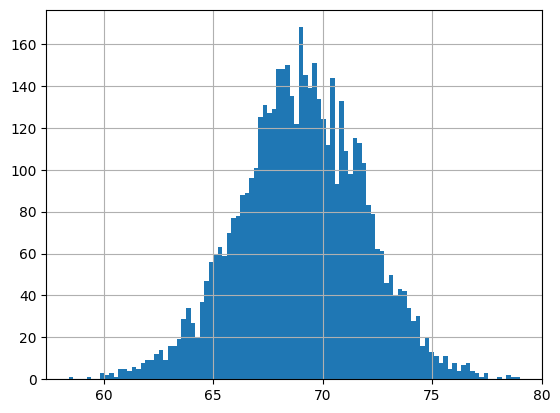

In [34]:
males = data[data['Gender'] == 'Male']['Height']
males.hist(bins=100)

In [35]:
males.describe()['mean']

np.float64(69.02634590621741)

In [36]:
males.describe()['std']

np.float64(2.863362228660647)

In [37]:
count, devision = np.histogram(males, bins=100)
print(count)
print(devision)

[  1   0   0   0   1   0   0   3   2   3   1   5   5   4   6   5   8   9
   9  12  14   9  16  16  19  29  34  27  20  37  47  56  60  63  59  70
  77  78  88  89  96 101 125 131 127 129 148 148 150 135 122 168 145 139
 151 134 124 112 144  93 133 109  98 115 113 103  83  79  62  61  46  50
  40  43  42  34  28  30  16  20  13  11   8  11   5   8   4   7   8   4
   3   1   3   0   0   1   0   2   1   1]
[58.40690493 58.61282331 58.81874168 59.02466005 59.23057843 59.4364968
 59.64241518 59.84833355 60.05425192 60.2601703  60.46608867 60.67200705
 60.87792542 61.0838438  61.28976217 61.49568054 61.70159892 61.90751729
 62.11343567 62.31935404 62.52527241 62.73119079 62.93710916 63.14302754
 63.34894591 63.55486429 63.76078266 63.96670103 64.17261941 64.37853778
 64.58445616 64.79037453 64.9962929  65.20221128 65.40812965 65.61404803
 65.8199664  66.02588478 66.23180315 66.43772152 66.6436399  66.84955827
 67.05547665 67.26139502 67.46731339 67.67323177 67.87915014 68.08506852
 68.290986

In [38]:
ideal = norm.rvs(size=len(males), loc=males.describe()['mean'], scale=males.describe()['std'])
ideal

array([64.89415393, 68.04270282, 66.24318249, ..., 67.48909186,
       67.56168659, 65.22880838])

In [39]:
ideal_count, ideal_devision = np.histogram(ideal, bins=100)
print(ideal_count)
print(ideal_devision)

[  1   0   0   2   0   0   0   0   0   0   5   3   0   6   3   4  11   6
   3  11  20  13  17  19  27  27  28  37  37  33  49  58  62  73  79  75
  89  76  89  93 115 123 123 141 121 156 139 139 130 163 143 159 160 156
 137 137 130 120 136 121 125  92 108  93  98  83  71  62  57  43  45  37
  43  41  33  27  21  23  18  14   8  10   9   4   2   7   5   3   2   2
   2   0   0   1   2   1   0   1   1   1]
[58.18231729 58.39697967 58.61164205 58.82630443 59.04096681 59.2556292
 59.47029158 59.68495396 59.89961634 60.11427873 60.32894111 60.54360349
 60.75826587 60.97292826 61.18759064 61.40225302 61.6169154  61.83157778
 62.04624017 62.26090255 62.47556493 62.69022731 62.9048897  63.11955208
 63.33421446 63.54887684 63.76353923 63.97820161 64.19286399 64.40752637
 64.62218876 64.83685114 65.05151352 65.2661759  65.48083828 65.69550067
 65.91016305 66.12482543 66.33948781 66.5541502  66.76881258 66.98347496
 67.19813734 67.41279973 67.62746211 67.84212449 68.05678687 68.27144926
 68.486111

(array([  1.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,
          3.,   0.,   6.,   3.,   4.,  11.,   6.,   3.,  11.,  20.,  13.,
         17.,  19.,  27.,  27.,  28.,  37.,  37.,  33.,  49.,  58.,  62.,
         73.,  79.,  75.,  89.,  76.,  89.,  93., 115., 123., 123., 141.,
        121., 156., 139., 139., 130., 163., 143., 159., 160., 156., 137.,
        137., 130., 120., 136., 121., 125.,  92., 108.,  93.,  98.,  83.,
         71.,  62.,  57.,  43.,  45.,  37.,  43.,  41.,  33.,  27.,  21.,
         23.,  18.,  14.,   8.,  10.,   9.,   4.,   2.,   7.,   5.,   3.,
          2.,   2.,   2.,   0.,   0.,   1.,   2.,   1.,   0.,   1.,   1.,
          1.]),
 array([58.18231729, 58.39697967, 58.61164205, 58.82630443, 59.04096681,
        59.2556292 , 59.47029158, 59.68495396, 59.89961634, 60.11427873,
        60.32894111, 60.54360349, 60.75826587, 60.97292826, 61.18759064,
        61.40225302, 61.6169154 , 61.83157778, 62.04624017, 62.26090255,
        62.47556493, 62.69

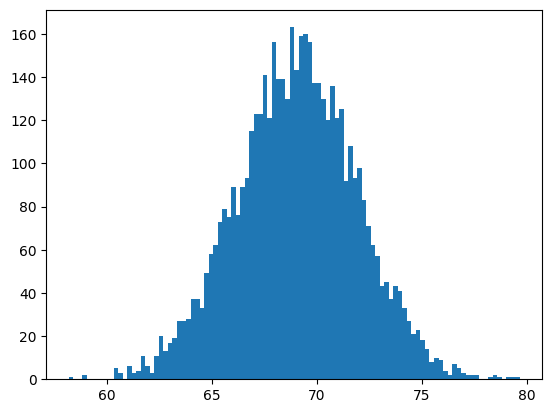

In [40]:
plt.hist(ideal, bins=100)

In [41]:
kl(count, ideal_count)

C:\Users\Soheil\AppData\Local\Temp\ipykernel_4556\4271909869.py:2: RuntimeWarning: divide by zero encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Soheil\AppData\Local\Temp\ipykernel_4556\4271909869.py:2: RuntimeWarning: invalid value encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Soheil\AppData\Local\Temp\ipykernel_4556\4271909869.py:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Soheil\AppData\Local\Temp\ipykernel_4556\4271909869.py:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))


np.float64(69.35487089020519)

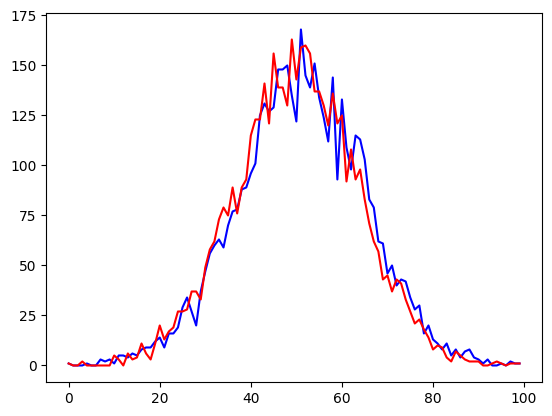

In [42]:
plt.plot(count, c="blue")
plt.plot(ideal_count, c="red")

In [43]:
count = count / 5000
ideal_count = ideal_count / 5000

In [44]:
kl(count, ideal_count)

C:\Users\Soheil\AppData\Local\Temp\ipykernel_4556\4271909869.py:2: RuntimeWarning: divide by zero encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Soheil\AppData\Local\Temp\ipykernel_4556\4271909869.py:2: RuntimeWarning: invalid value encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Soheil\AppData\Local\Temp\ipykernel_4556\4271909869.py:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Soheil\AppData\Local\Temp\ipykernel_4556\4271909869.py:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))


np.float64(0.013870974178041033)